In [1]:
import numpy as np #numpy for math operation
import os
import utils
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
from natsort import natsorted
from pydicom import dcmread
import matplotlib.gridspec as gridspec
import h5py
data_path = "D:/globus slate shared data Tankam Lab/cells with H2O2 after 3hours of application"
average_LivCurve = True
fitting_method = "CPU"
frameSeparationTime = 0.001 #1ms frame to frame time interval
alivInitial  = 1 #initla guess for aliv parameter curve fitting
swiftInitial = 1 # initial guess for swiftness parameter curve fitting
bounds = (0, np.inf)

In [2]:
pic_paths = []
for scan_num in natsorted(os.listdir(data_path)):
    if scan_num.startswith('scan'):
        pic_paths.append(os.path.join(data_path,scan_num,f'{scan_num}.h5'))
# with open(f'{pic_paths[0]}', 'rb') as handle:
#     b = pickle.load(handle)
with h5py.File(pic_paths[0], "r") as h5f:
    b = np.array(h5f["volume"])
    h5f.close()
slice_shape = (len(pic_paths), b.shape[1], b.shape[2])

In [3]:
blockRepeat = len(pic_paths)
blockPerVolume = 1 #only 1 block is used in our protocal
bscanLocationPerBlock = b.shape[0] #the number of B-scan in one 3D volume
numLocation = bscanLocationPerBlock * blockPerVolume # Number of total B-scan

print('Processing: ' + data_path)

## OCT intensity
height = b.shape[1]
width = b.shape[2]

aliv = np.zeros((numLocation, height, width))
swift = np.zeros((numLocation, height, width))
oct_db = np.zeros((numLocation, height, width))

Processing: D:/globus slate shared data Tankam Lab/cells with H2O2 after 3hours of application


In [4]:
sparseSequence, timePoints = utils.makeSparseDatadirect(data_path, bscanLocationPerBlock, blockRepeat, 2, slice_shape)

100%|██████████| 50/50 [00:05<00:00,  9.41it/s]


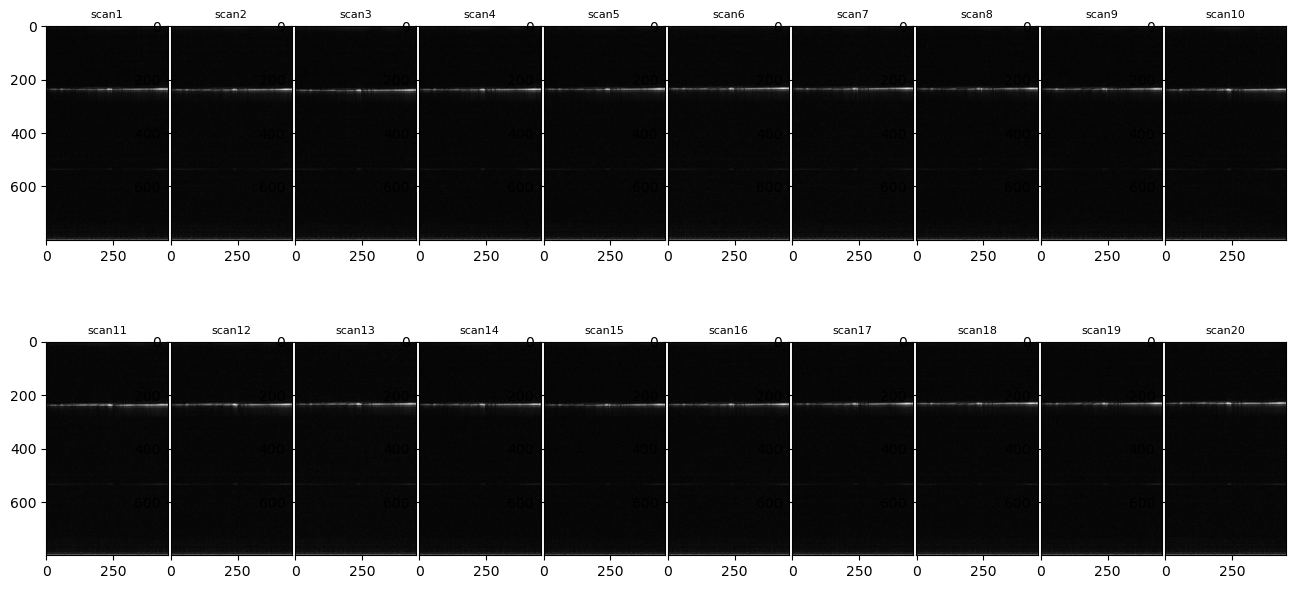

In [5]:
plt.figure(figsize=(16, 8))
gs1 = gridspec.GridSpec(2, 10)
gs1.update(wspace = 0.025, hspace = 0.05)

framenum=0
for i in range(20):
    ax1 = plt.subplot(gs1[i])
    plt.axis('on')
    ax1.imshow(sparseSequence[framenum, :, :], cmap="gray")
    plt.title(f'scan{framenum+1}', fontsize = 8)
    ax1.set_aspect('equal')
    framenum = framenum+1
plt.show()